In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw
import seaborn as sns

In [37]:
# Define Model path:
model_path  = os.getcwd() + '/keras_models/dnnregressor_choice_rt_09_12_18_18_47_03/model_0'
ckpt_path = os.getcwd() + '/keras_models/dnnregressor_choice_rt_09_12_18_18_47_03/ckpt_0_' + 'final'

# Load model
model = keras.models.load_model(model_path)

In [38]:
# Load weights
model.load_weights(ckpt_path)

In [15]:
# Make some data
data = []
v_vals = [-1, 1]

for v in v_vals:
    dataset, _ , __ = mdw.make_data_rt_choice(v_range = [v, v],
                                              a_range = [1, 1],
                                              w_range = [0.5, 0.5],
                                              method = 'sim',
                                              write_to_file = False,
                                              n_samples = 5000)
    data.append(dataset)

dataset = pd.concat(data)

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated


In [16]:
# Make dataset feedable to model (wfpt)
features, labels, __, ___ = mdw.train_test_split_rt_choice(data = dataset,
                                                           p_train = 1,
                                                           write_to_file = False,
                                                           from_file = False,
                                                           backend = 'keras')

In [39]:
# Get Predictions (wfpt)
predictions = model.predict(features)
dataset['pred_likelihood'] = predictions

In [40]:
# Prepare for plotting
dataset.sort_values('rt', axis = 0, ascending = True, inplace = True, kind = 'quicksort', na_position = 'last')
dataset_long = dataset.melt(id_vars = ['rt', 'choice', 'v'], 
                            value_vars = ['nf_likelihood', 'pred_likelihood'], 
                            var_name = 'group', 
                            value_name = 'likelihood')

[(0, 4)]

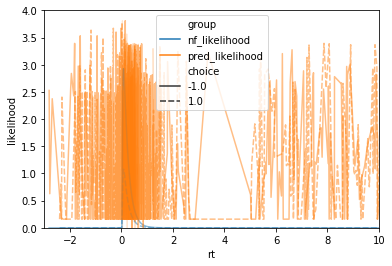

In [41]:
# Plot
data_tmp = dataset_long.loc[dataset_long['v'] == 1.0]
ax = sns.lineplot(x = "rt", 
                  y = "likelihood", 
                  data = data_tmp, 
                  hue = 'group',
                  style = 'choice',
                  alpha = 0.5)


# g.add_legend(title="Meal")
# g.set_axis_labels("Total bill ($)", "")
ax.set(xlim = (- 3, 10))
ax.set(ylim = (- 0, 4))
# g.despine(trim=True)
# g.fig.set_size_inches(6.5, 3.5)
# g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
# plt.setp(g.ax.get_yticklabels(), rotation=30);

[(0, 4)]

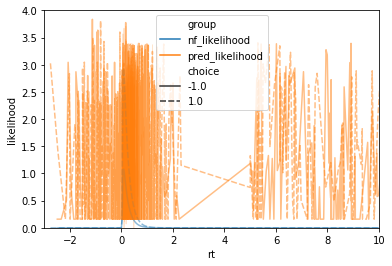

In [42]:
# Plot
data_tmp = dataset_long.loc[dataset_long['v'] == -1.0]
ax = sns.lineplot(x = "rt", 
                  y = "likelihood", 
                  data = data_tmp, 
                  hue = 'group',
                  style = 'choice',
                  alpha = 0.5)

# g.add_legend(title="Meal")
# g.set_axis_labels("Total bill ($)", "")
ax.set(xlim = (- 3, 10))
ax.set(ylim = (- 0, 4))
# g.despine(trim=True)
# g.fig.set_size_inches(6.5, 3.5)
# g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
# plt.setp(g.ax.get_yticklabels(), rotation=30);

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.get_weights()

[array([[ 1.26833990e-02,  1.53541967e-01,  2.86218226e-01,
         -3.53604206e-03, -8.10186118e-02,  2.38409698e-01,
          5.62593862e-02, -5.34851134e-01, -1.72316641e-01,
          3.87458831e-01,  2.54118294e-01, -6.76753372e-02,
         -2.44452506e-01, -2.24182859e-01, -1.12424642e-01,
         -6.22404031e-02, -3.75490874e-01,  2.25882486e-01,
          3.09974561e-03, -7.32641146e-02],
        [ 2.53425151e-01, -3.75341415e-01,  2.43738905e-01,
          4.33980376e-01, -3.44382203e-03, -2.09377557e-02,
         -1.37766793e-01, -2.52418101e-01, -2.43552268e-01,
         -7.90429935e-02, -2.54691038e-02, -2.87719835e-02,
          1.65471956e-01,  2.15807632e-02,  1.36241257e-01,
          8.35717246e-02,  2.63633698e-01, -3.07361066e-01,
          1.70545369e-01,  2.00319812e-01],
        [-4.26947147e-01, -6.40894532e-01, -2.26347834e-01,
         -8.19873363e-02, -6.44948244e-01, -5.42261958e-01,
         -2.33932436e-01, -2.08790854e-01, -4.52886939e-01,
         -2.